## Øving 1

### Oppgave 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by cardinal(xdata, x)
    Return: An array with the interpolation polynomial. 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly


#### a)

Population at 1980: [4.49456485e+09]


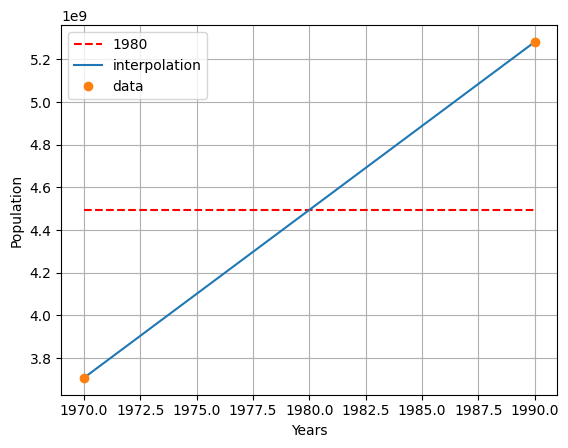

In [32]:
years = np.array([1960, 1970, 1990, 2000])
population = np.array([3039585530, 3707475887, 5281653820, 6079603571])
t = np.linspace(years[1], years[2], 201)

li = cardinal(years[1:3], t)
px = lagrange(population[1:3], li)
interpolated = px[np.where(t == 1980.0)]
print(f"Population at 1980: {interpolated}")

plt.hlines(y=[interpolated], xmin=years[1], xmax=years[2], label="1980", color='r', linestyles='--')
plt.plot(t, px, label="interpolation")
plt.plot(years[1:3], population[1:3], 'o', label="data")
plt.xlabel("Years")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.show()


#### b)

Population at 1980: [4.45483198e+09]


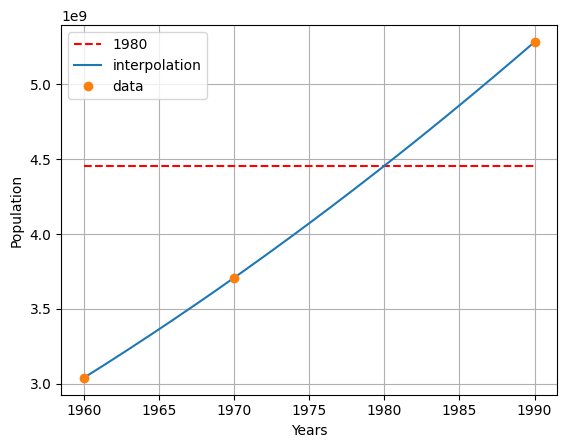

In [39]:
t = np.linspace(years[0], years[2], 301)

li = cardinal(years[0:3], t)
px = lagrange(population[0:3], li)

interpolated = px[np.where(t == 1980.0)]
print(f"Population at 1980: {interpolated}")

plt.hlines(y=[interpolated], xmin=years[0], xmax=years[2], label="1980", color='r', linestyles='--')
plt.plot(t, px, label="interpolation")
plt.plot(years[0:3], population[0:3], 'o', label="data")
plt.xlabel("Years")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.show()


#### c)

Population at 1980: [4.47288829e+09]


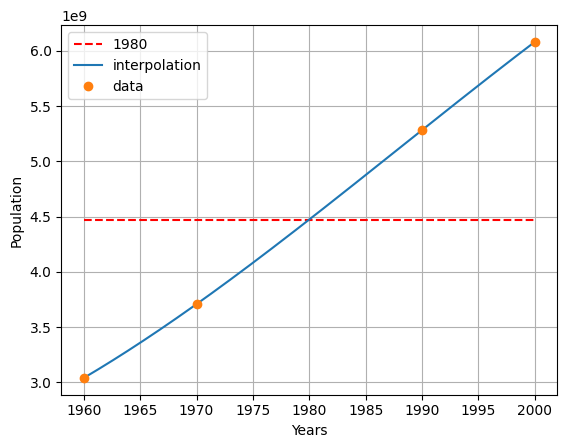

In [40]:
t = np.linspace(years[0], years[-1], 401)

li = cardinal(years, t)
px = lagrange(population, li)

interpolated = px[np.where(t == 1980.0)]
print(f"Population at 1980: {interpolated}")

plt.hlines(y=[interpolated], xmin=years[0], xmax=years[-1], label="1980", color='r', linestyles='--')
plt.plot(t, px, label="interpolation")
plt.plot(years, population, 'o', label="data")
plt.xlabel("Years")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.show()


#### d)

Ved bruk av ulikt antall punkter fikk jeg befolkning lik 4.4946e+09, 4.4548e+09 og 4.4729e+09. Befolkningen var 4.4526e+09, altså var jeg nærmest ved bruk av punktene fra 1960 til 1990.

### Oppgave 3

#### a)

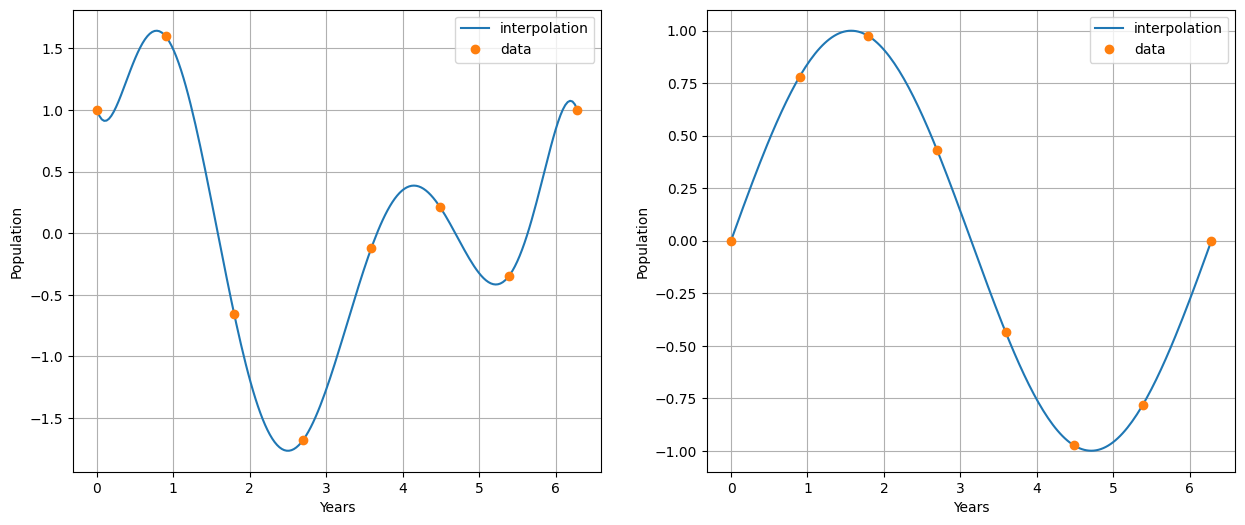

In [53]:
ti = np.array([0, 0.8976, 1.7952, 2.6928, 3.5904, 4.4880, 5.3856, 6.2832])
xi = np.array([1, 1.5984, -0.6564, -1.6828, -0.1191, 0.2114, -0.3514, 1])
yi = np.array([0, 0.7818, 0.9750, 0.4339, -0.4339, -0.975, -0.7818, 0])

t = np.linspace(0,ti[-1],201)

li = cardinal(ti, t)

pix = lagrange(xi, li)
piy = lagrange(yi, li)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(t, pix, label="interpolation")
ax2.plot(t, piy, label="interpolation")
ax1.plot(ti, xi, 'o', label="data")
ax2.plot(ti, yi, 'o', label="data")
ax1.set_xlabel("Years")
ax1.set_ylabel("Population")
ax2.set_xlabel("Years")
ax2.set_ylabel("Population")
ax1.legend()
ax2.legend()
ax1.grid()
ax2.grid()
plt.show()


#### b)

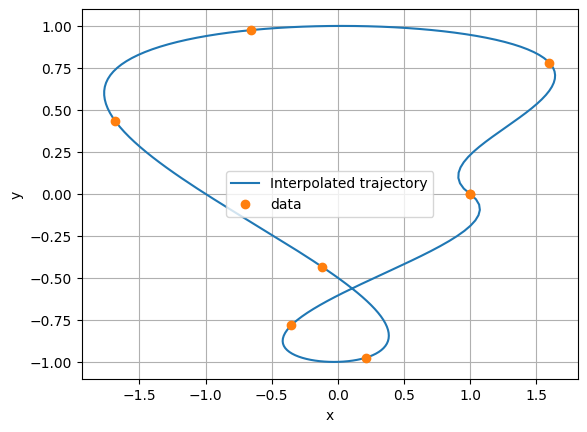

In [60]:
plt.plot(pix, piy, label="Interpolated trajectory")
plt.plot(xi, yi, 'o', label="data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#### c)

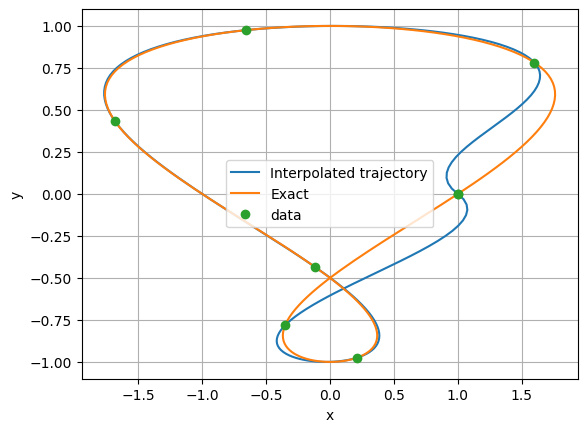

In [63]:
def x(t):
    return np.cos(t) + np.sin(2*t)

def y(t):
    return np.sin(t)

x = x(t)
y = y(t)

plt.plot(pix, piy, label="Interpolated trajectory")
plt.plot(x, y, label="Exact")
plt.plot(xi, yi, 'o', label="data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

### Oppgave 4

#### a)

##### 4)

Comparing the coefficients, we see that both the Taylor polynomial centered at $x=0$ have no constant term, since they both interpolate exactly at $0$. Moreover, the Taylor polynomial centered at $x=\pi/4$ only has a small constant being approximately $0.01$.

All the polynomials have a coefficient of around $1$ for the linear term, though both the second Taylor polynomial and the Lagrange interpolating polynomial have a slighter larger value for this coefficient.

The coefficient for the quadratic term is small for both the second Taylor polynomial and the Lagrange interpolating polynomial, and zero for the first Taylor polynomial.

Lastly we observe that the coefficient for the the cubic term is very similar for both the second Taylor polynomial and the Lagrange interpolating polynomial, but approximately 3 times larger for the first Taylor polynomial. This makes sense, since the first Taylor polynomial only has information from the left end of the interval and thus is likely to overshoot at the right end.

All in all we see that the second Taylor polynomial and the Lagrange interpolating polynomial have similar coefficients since they balance the weight around the interval, while the first Taylor polynomial is centered around $x=0$.

#### b)

##### 1)

Taylor's theorem gives the following expression for the error for the Taylor polynomial of $f$ of order $n$ centered around $x=a$:
\begin{align*}
    E_n(x)
    =
    f(x) - P_n(x)
    =
    \frac{f^{(n+1)}(s)}{(n+1)!}(x-a)^{n+1},
\end{align*}
where $s\in(a,x)$.

In our case $a=0$, so we can bound
\begin{align*}
    \lvert (x-0)^{n+1} \rvert \leq \left( \frac{\pi}{2} \right)^n,
\end{align*}
since $x\in[0, \pi/2]$.

Moreover, since the derivative of $\sin(x)$ is $\cos(x)$, and the derivative of $\cos(x)$ is $-\sin(x)$, we have that $\lvert f^{(n+1)}(x) \rvert \leq 1$ for all $x \in [0, \pi/2]$.

Thus we get the error bound
\begin{align*}
    \lvert E_n(x) \rvert
    \leq
    \frac{\pi^n}{2^n(n+1)!}.
\end{align*}

Note that for $n > 0$ we have $(n+1)! > (\pi/2)^n$ with (n+1)! additionally growing faster than $(\pi/2)^n$, and thus the error is decreasing. To find the right order, we bound the error for various $n$:
\begin{align*}
    &\text{• } E_1    \leq 0.785399\\
    &\text{• } E_2    \leq 0.411234\\
    &\text{• } E_3    \leq 0.161492\\
    &\text{• } E_4    \leq 0.050734\\
    &\text{• } E_5    \leq 0.013283\\
    &\text{• } E_6    \leq 0.002981\\
    &\text{• } E_7    \leq 0.000586\\
    &\text{• } E_8    \leq 0.000103\\
    &\text{• } E_9    \leq 0.000017\\
    &\text{• } E_{10} \leq 0.000003\\
    &\text{• } E_{11} < 0.000001
\end{align*}
Thus we need a Taylor polyomial of at least order $11$ to guarantee an error of less than 10^(-6) on the interval.

#### c)